In [4]:
import matplotlib.pyplot as plt
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
        levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [5]:
# libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# Load data
X,y = make_blobs(centers = 2 , random_state = 66, cluster_std  = 4, shuffle = 1)



In [7]:
#print data
print ("Координаты точек: ") 
print (X[:15])
print ("Метки класса: ") 
print (y[:15])

Координаты точек: 
[[-14.80437794  -7.18377798]
 [ -2.60632729   0.20074702]
 [ -7.67410393  -0.92722787]
 [-18.73964269  -1.88968606]
 [ -3.7511755    3.11333437]
 [ -6.13559977  -8.39517379]
 [ -8.10457133   6.15227722]
 [  4.91341461  -2.95516942]
 [ -2.86156125  10.56078045]
 [  0.52303829   3.14548666]
 [  3.53563356   5.80649298]
 [ -6.05018557  -2.10920558]
 [  0.8102374    1.86943425]
 [ -8.0759995   -0.91582206]
 [ -9.37948058 -10.35367349]]
Метки класса: 
[0 1 0 0 1 0 1 0 1 1 1 0 1 1 0]


<function matplotlib.pyplot.show(*args, **kw)>

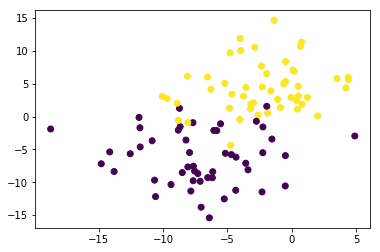

In [8]:
plt.scatter (X[:,0], X[:,1], c=y)
plt.show

In [9]:
# data dividing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

<function matplotlib.pyplot.show(*args, **kw)>

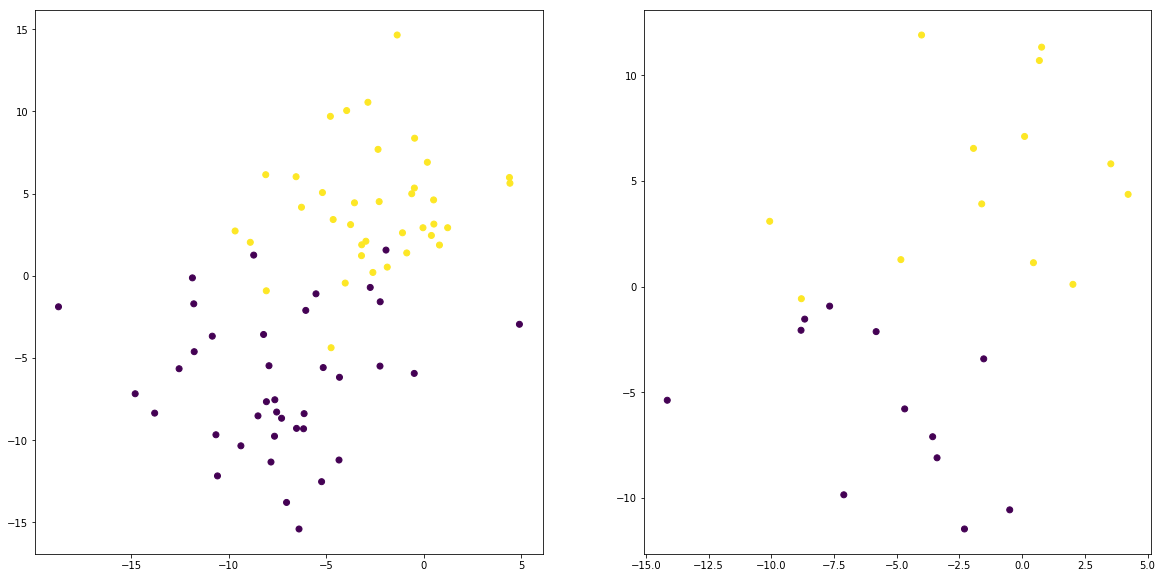

In [10]:
# show data
plt.figure(figsize=(20,10))
plt.subplot (1,2,1)
plt.scatter (X_train[:,0], X_train[:,1], c=y_train)

plt.subplot (1,2,2)
plt.scatter (X_test[:,0], X_test[:,1], c=y_test)
plt.show


Prediction and test: 
[1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1]
[1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1]
Confusion matrix: 
[[12  0]
 [ 1 12]]
Accuracy score:  0.96
             precision    recall  f1-score   support

          0       0.92      1.00      0.96        12
          1       1.00      0.92      0.96        13

avg / total       0.96      0.96      0.96        25



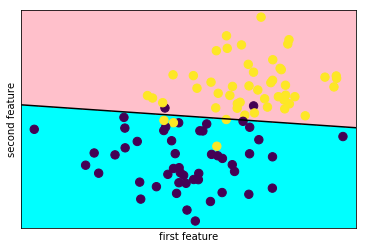

In [70]:

from sklearn.metrics import roc_curve, auc, roc_auc_score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print ('Prediction and test: ')
print (prediction)
print(y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))


plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)



In [60]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, classifier.predict(X_test))
auc(false_positive_rate, true_positive_rate)
# 0.857142857143



0.9615384615384616

In [71]:
roc_auc_score(y_test, prediction)

0.9615384615384616

Prediction and test: 
[1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1]
Confusion matrix: 
[[ 9  3]
 [ 0 13]]
Accuracy score:  0.88
             precision    recall  f1-score   support

          0       1.00      0.75      0.86        12
          1       0.81      1.00      0.90        13

avg / total       0.90      0.88      0.88        25



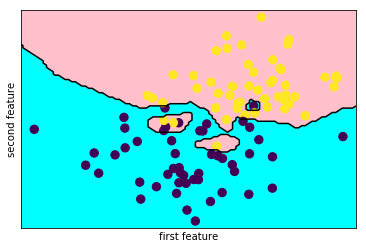

In [21]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))



plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)



In [68]:
roc_auc_score(y_test, knn.predict(X_test))

1.0

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print ('Prediction and test: ')
print (prediction)
print(y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))



print ('KNN score: ', knn.score(X_train, y_train))
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_b = GaussianNB()


naive_b.fit(X_train, y_train)
prediction = naive_b.predict(X_test)

print ('Prediction and test: ')
print (prediction)
print(y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))



print ('NB score: ', naive_b.score(X_train, y_train))
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)